In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model = DecisionTreeRegressor(random_state=42)  # depth=3 keeps it simple

# Train the model
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE, RMSE and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

RMSE: 0.71
R^2 Score: 0.61


# 🏡 Evaluation of Decision Tree on California Housing Data

- **RMSE (Root Mean Squared Error): 0.71**  
  - On average, the model’s predictions deviate from actual house values by about **0.71 units** (in the target’s scaled units).  
  - This is an improvement compared to Linear Regression (RMSE = 0.75), showing that the Decision Tree captures **non-linear patterns** better.  

- **R² Score: 0.61**  
  - The model explains **61% of the variance** in median house values.  
  - This is higher than Linear Regression’s R² = 0.58, indicating a stronger fit.  
  - However, **39% of the variance remains unexplained**, meaning there’s still room for improvement with more advanced models.

---



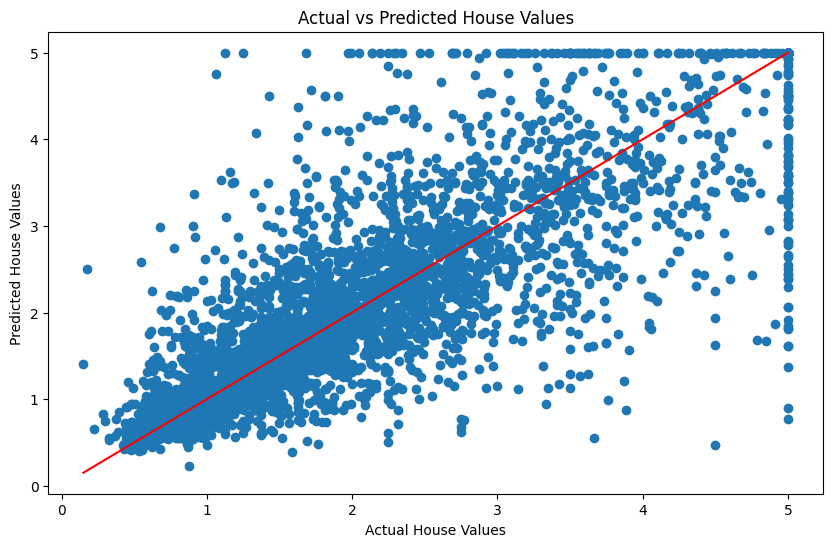

In [6]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect predictions
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()

# Visualization: Actual vs Predicted House Values (Decision Tree)

The scatter plot compares **actual median house values** (x-axis) with the **predicted values** from the Decision Tree model (y-axis).  

- **Red Line**: Represents the *ideal case* where predicted values exactly equal actual values (`y = x`).  
- **Blue Dots**: Each point is a house instance.  
  - If a point lies **on the red line**, the prediction is perfect.  
  - If a point is **above the line**, the model overestimated the value.  
  - If a point is **below the line**, the model underestimated the value.  

## Observations
- Predictions generally follow the upward trend, meaning the model **captures the relationship** between features and house values.  
- However, there’s noticeable **spread around the line**, especially at higher house values, showing **reduced accuracy for expensive houses**.  
- Many predictions appear **capped near 5.0**, which indicates the Decision Tree may be hitting the maximum target value (a common issue with tree-based models on scaled data).  

## Interpretation
The plot confirms that the Decision Tree performs reasonably well, with predictions aligned to actuals but not perfectly.  
- Works well for **low-to-mid value houses**.  
- Struggles with **higher-value houses**, where variance is larger.  

This matches the evaluation metrics:  
- **RMSE: 0.71** → good but not perfect accuracy.  
- **R² = 0.61** → explains 61% of variance, leaving 39% unexplained.  


In [7]:
import pandas as pd

feature_importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

            Importance
MedInc        0.527615
AveOccup      0.131323
Latitude      0.093444
Longitude     0.084146
AveRooms      0.052467
HouseAge      0.051866
Population    0.029957
AveBedrms     0.029183


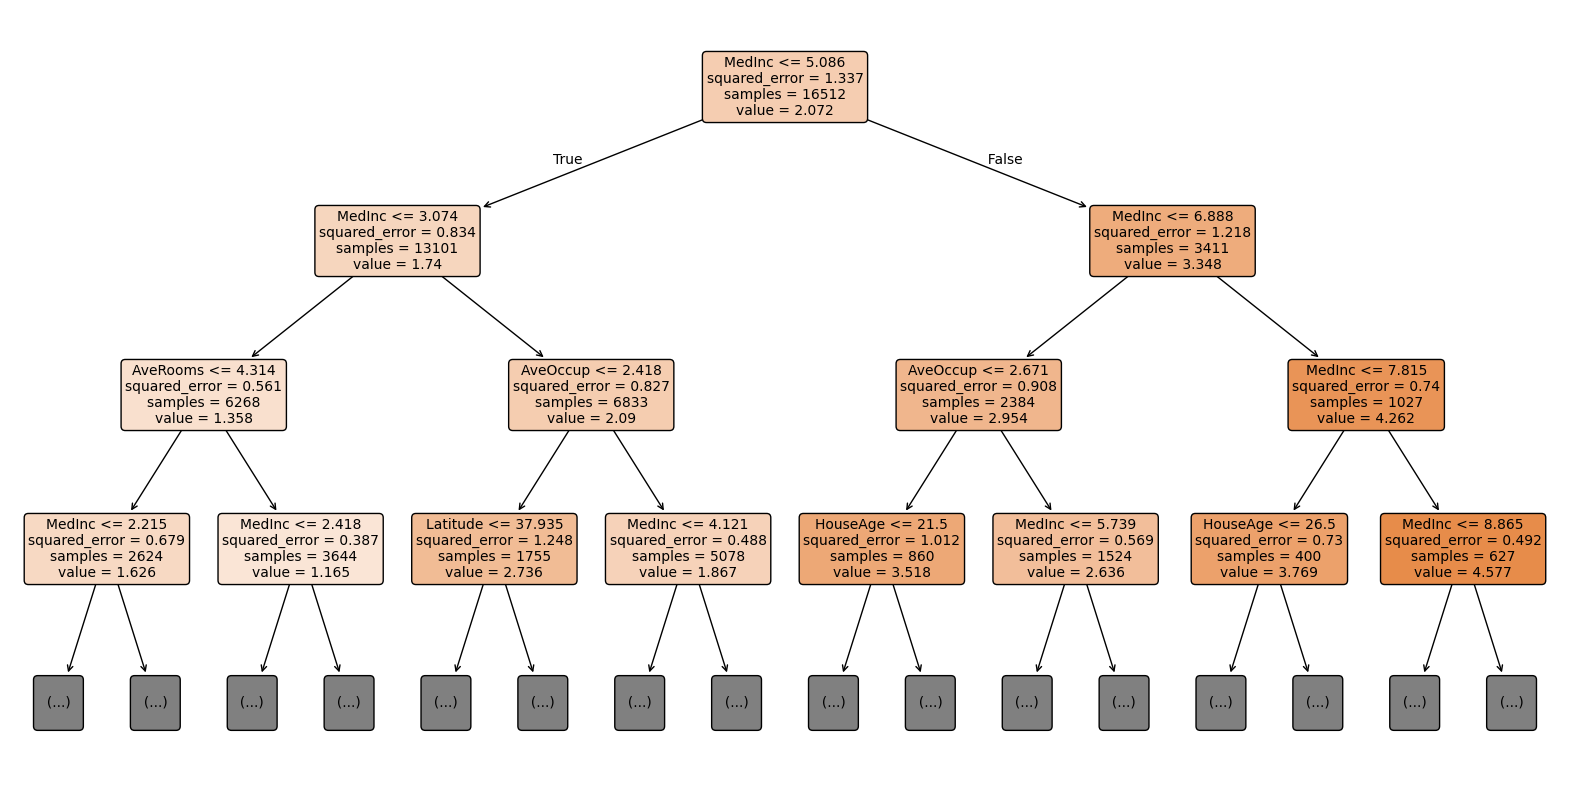

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.show()

# Decision Tree Visualization (California Housing)

This diagram shows the structure of a **Decision Tree Regressor** trained on the California housing dataset.  
At each node:  
- **Feature & threshold** (e.g., `MedInc <= 5.086`) → the decision rule that splits the data.  
- **squared_error** → measure of variance at that node (lower = better fit).  
- **samples** → number of training samples reaching that node.  
- **value** → average target value (predicted median house value) for that node.

---

## Key Observations
1. **Root Node (Top)**  
   - The first split is on **Median Income (MedInc <= 5.086)**.  
   - This confirms that **income is the most important feature** for predicting housing values.  

2. **Left Subtree (MedInc <= 5.086 → Lower-Income Areas)**  
   - Splits further on **AveRooms** (average rooms per household) and **AveOccup** (average household size).  
   - These features refine predictions for lower-value houses.  
   - Predicted values range from **~1.1 to ~2.7**.  

3. **Right Subtree (MedInc > 5.086 → Higher-Income Areas)**  
   - Splits again on **MedInc** and **AveOccup**, with some influence from **HouseAge**.  
   - Predicted values are much higher, ranging from **~2.6 up to ~4.6**.  

4. **Deeper Nodes**  
   - Show smaller squared error and fewer samples.  
   - These are more specific rules that capture local housing price patterns.  

---

## Interpretation
- **Median Income (MedInc)** is the dominant predictor of house prices, aligning with intuition (wealthier areas → higher housing values).  
- **Other features** like **AveRooms, AveOccup, Latitude, and HouseAge** play secondary roles.  
- The tree structure provides **interpretability**: you can trace any prediction back to a sequence of rules.  
- However, deeper branches may overfit small groups of houses, which is why pruning or limiting depth is often necessary.

---

**Takeaway:**  
The Decision Tree captures **non-linear relationships** between housing features and median value, and the visualization makes the model’s reasoning process highly interpretable.
